In [133]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%precision 3
%matplotlib inline

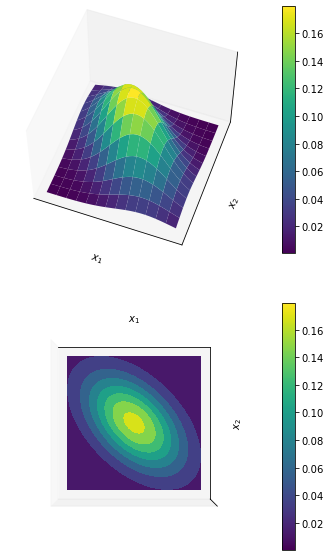

In [143]:
#1.1, 2.1을 식으로 구현해서 그래프화
#식에서 1000번 뽑는방법 모르겠음

N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

#determine muX, muY
muX, muY = 0., 0.
mu = np.array([muX, muY])
#determine stdX, stdY
stdX, stdY = [1., -1.], [2., -2.]
Sigma2 = np.array([stdX, stdY])

def twoDNormFormula(mu, Sigma):

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    
    coe = 1.0 / ((2 * np.pi)**2 * Sigma_det)**0.5
    Z = coe * np.e ** (-0.5 * (Sigma_inv[0,0]*(X-mu[0])**2 + (Sigma_inv[0,1] + Sigma_inv[1,0])*(X-mu[0])*(Y-mu[1]) + Sigma_inv[1,1]*(Y-mu[1])**2))
    
    return  Z

Z = twoDNormFormula(mu, Sigma)

# plot using subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1,projection='3d')

p = ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1 = fig.colorbar(p, ax=ax1)

ax2 = fig.add_subplot(2,1,2,projection='3d')
p2 = ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2 = fig.colorbar(p, ax=ax2)

plt.show()

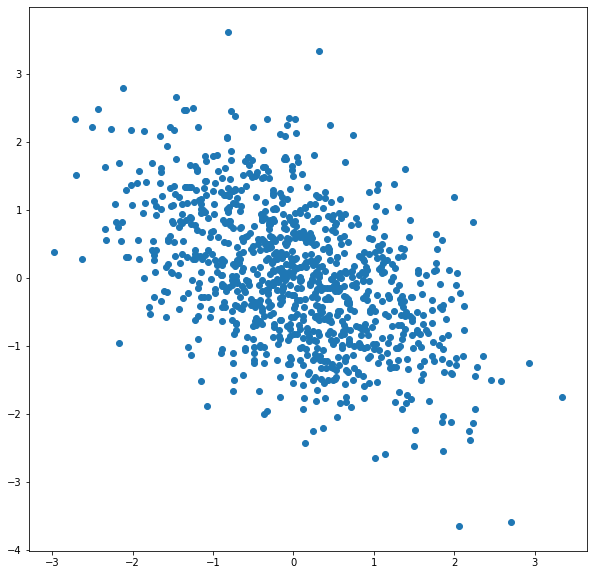

In [154]:
#2.1 몰라서 메소드 씀
#그래프는 X, Y추출값

N = 1000
twoDGauss = np.random.multivariate_normal(mu, Sigma, N)
twoDGauss_X = twoDGauss[0]
twoDGauss_Y = twoDGauss[1]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

p = ax1.scatter(pd.DataFrame(twoDGauss)[0], pd.DataFrame(twoDGauss)[1])

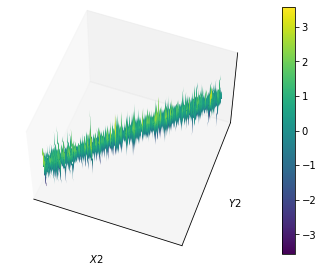

In [163]:
#2.1 공분산 그래프화 해봄
#왜이런지는 나도 모름

twoDCov = np.cov(twoDGauss)
X2 = np.linspace(-4, 4, N)
Y2 = np.linspace(-4, 4, N)

# plot using subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1,projection='3d')

p = ax1.plot_surface(X2, Y2, twoDCov, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$X2$')
ax1.set_ylabel(r'$Y2$')
ax1 = fig.colorbar(p, ax=ax1)

plt.show()

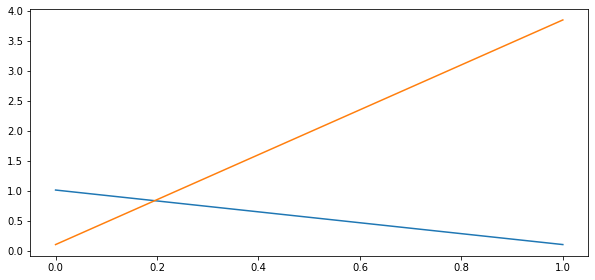

In [177]:
#2.2 해봄

def oneDNormRand(mu, sigma, n=1):
    arr=[]
    for i in range(n):
        val = random.gauss(mu, sigma)
        arr.append(val)
    
    return  arr

mu1, sigma1 = 0,1
sample1 = oneDNormRand(mu1,sigma1,1000)
oneDCov1 = np.var(sample1)
                  
mu2, sigma2 = 0,2
sample2 = oneDNormRand(mu2,sigma2,1000)
oneDCov2 = np.var(sample2)

oneDCov = np.cov(sample1, sample2)

# plot using subplots
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)

p = ax1.plot(oneDCov)

plt.show()

In [ ]:
#참조 코드
#https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()